# NeoWsClient Python Package
`NeoWsClient` is a Python client for interacting with NASA's Near Earth Object Web Service (NeoWs). It allows users to retrieve and analyze data about near-Earth asteroids, including their close approach data, size, and potential hazards.

This project aims to develop a Python package that interfaces with the Near Earth Object Web Service (NeoWs) API, facilitating seamless access to comprehensive near-earth Asteroid information. NeoWs provides a robust set of functionalities enabling users to search for Asteroids based on their closest approach date to Earth, retrieve detailed data about specific Asteroids using their NASA JPL small body id, and explore the extensive dataset encompassing information about various Asteroids.


# Hello Xiaokuan!!!!! This is Jack 

## IMPORT
First, make sure the NeoWsClient package is installed:  
`pip install neowsclient`

In [1]:
from neows_client import NeoWsClient
API_KEY = 'DEMO_KEY'    # replace with your own API key

## Setup
let's initialize the client:

In [2]:
neows_client = NeoWsClient(api_key=API_KEY)

## Retrieving Asteroid Data
Retrieve data about asteroids for a specified date range:

In [3]:
asteroids_data = neows_client.get_asteroid_feed('2023-01-01', '2023-01-08')
print(asteroids_data)

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-08&end_date=2023-01-15&detailed=false&api_key=DEMO_KEY', 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-12-25&end_date=2023-01-01&detailed=false&api_key=DEMO_KEY', 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-01&end_date=2023-01-08&detailed=false&api_key=DEMO_KEY'}, 'element_count': 127, 'near_earth_objects': {'2023-01-01': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2154347?api_key=DEMO_KEY'}, 'id': '2154347', 'neo_reference_id': '2154347', 'name': '154347 (2002 XK4)', 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2154347', 'absolute_magnitude_h': 16.07, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.6238839022, 'estimated_diameter_max': 3.6311147929}, 'meters': {'estimated_diameter_min': 1623.883902199, 'estimated_diameter_max': 3631.1147928846}, 'miles': {'estimated_diameter_min': 1.0090343642, 'estimated_diamete

## Looking Up a Specific Asteroid

Retrieve detailed data about a specific asteroid using its NASA JPL small body ID.

In [4]:
asteroid_data = neows_client.get_asteroid_lookup(asteroid_id='3542519')
asteroid_data

{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3542519?api_key=DEMO_KEY'},
 'id': '3542519',
 'neo_reference_id': '3542519',
 'name': '(2010 PK9)',
 'designation': '2010 PK9',
 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3542519',
 'absolute_magnitude_h': 21.81,
 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1154928176,
   'estimated_diameter_max': 0.258249791},
  'meters': {'estimated_diameter_min': 115.4928175848,
   'estimated_diameter_max': 258.2497910326},
  'miles': {'estimated_diameter_min': 0.0717638876,
   'estimated_diameter_max': 0.1604689309},
  'feet': {'estimated_diameter_min': 378.9134556449,
   'estimated_diameter_max': 847.2762444114}},
 'is_potentially_hazardous_asteroid': True,
 'close_approach_data': [{'close_approach_date': '1900-06-01',
   'close_approach_date_full': '1900-Jun-01 16:40',
   'epoch_date_close_approach': -2195882400000,
   'relative_velocity': {'kilometers_per_second': '30.9354328365',
    'ki

## Browsing Asteroids

Browse the overall dataset of known asteroids.
You can do more sophisticated analysis based on this data

In [5]:
all_asteroids = neows_client.browse_asteroids()

## Querying Asteroids

Filter asteroids based on criteria such as diameter and potential hazard:

In [6]:
data = neows_client.get_asteroid_feed('2023-01-01', '2023-01-08')

# Flatten the data, as it's nested under dates
asteroids = [asteroid for date in data['near_earth_objects'] for asteroid in data['near_earth_objects'][date]]
filtered_asteroids = neows_client.query_asteroids(asteroids, 100)
print(filtered_asteroids)

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2154347?api_key=DEMO_KEY'}, 'id': '2154347', 'neo_reference_id': '2154347', 'name': '154347 (2002 XK4)', 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2154347', 'absolute_magnitude_h': 16.07, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.6238839022, 'estimated_diameter_max': 3.6311147929}, 'meters': {'estimated_diameter_min': 1623.883902199, 'estimated_diameter_max': 3631.1147928846}, 'miles': {'estimated_diameter_min': 1.0090343642, 'estimated_diameter_max': 2.25626943}, 'feet': {'estimated_diameter_min': 5327.7032616906, 'estimated_diameter_max': 11913.1066570875}}, 'is_potentially_hazardous_asteroid': False, 'close_approach_data': [{'close_approach_date': '2023-01-01', 'close_approach_date_full': '2023-Jan-01 18:44', 'epoch_date_close_approach': 1672598640000, 'relative_velocity': {'kilometers_per_second': '27.3921991495', 'kilometers_per_hour': '98611.9169381885', 'miles_per_hour'

## Analyzing Asteroids

Get statistical information about the asteroids:

In [7]:
stats = neows_client.get_asteroid_statistics(filtered_asteroids)
print(stats)

{'average_diameter': 473.58537260385333, 'max_diameter': 3631.1147928846, 'min_diameter': 102.3387195373, 'count': 62}



## Visualizing Asteroid Distribution

Visualize the distribution of asteroid diameters:

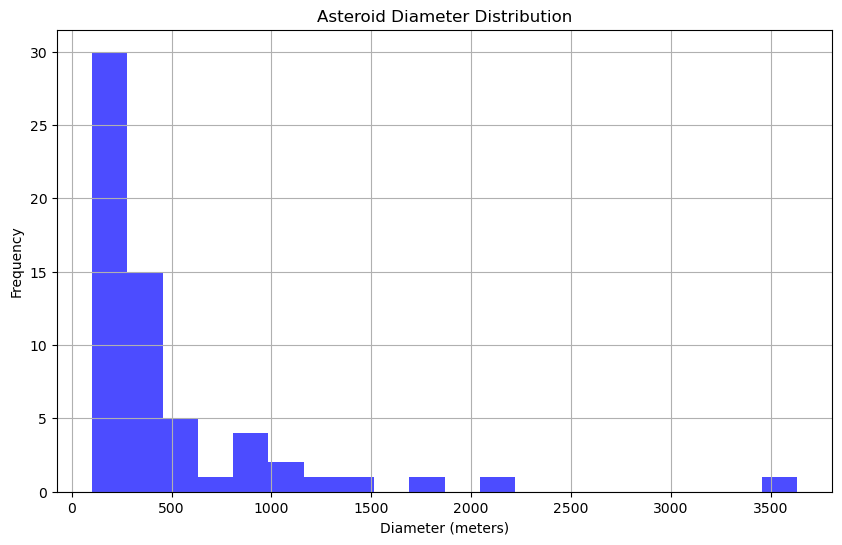

In [8]:
neows_client.plot_asteroid_diameter_distribution(filtered_asteroids)

## Analyzing Potential Hazards

Analyze the number of potentially hazardous asteroids:

In [9]:
hazard_count = neows_client.analyze_potential_hazards(filtered_asteroids)
print(f"Number of potentially hazardous asteroids: {hazard_count}")

Number of potentially hazardous asteroids: 8
